<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Day_045_NLP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.4 MB/s 
     |████████████████████████████████| 453 kB 71.9 MB/s 


In [3]:
data_ori = pd.read_csv('ChatbotData.csv')
mask = data_ori[data_ori['label'] == 0].index
data = data_ori.drop(mask)
data.loc[data['label'] == 1, 'label'] = 0
data.loc[data['label'] == 2, 'label'] = 1

In [4]:
data.head()

,Q,A,label
5290,1000일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요.,0
5291,10년 연애. 헤어졌습니다.,더 공허함이 크시겠네요.,0
5292,10년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요.,0
5293,10년 연예의끝,더 마음이 허하겠어요.,0
5294,10년만나다 헤어지네,충분히 슬퍼하고 충분히 아파하다가 이겨내세요.,0


In [76]:
data_0 = data[data['label'] == 0]
print(data_0.head(30))

                        Q                                A  label
5290        일 만난 여자친구와 이별               더 오래 만날 사람 만날 거예요.      0
5291          년 연애 헤어졌습니다                    더 공허함이 크시겠네요.      0
5292   년 연애사 되돌아보니 다 부질없네                 더 좋은 사람 만나실 거예요.      0
5293               년 연예의끝                     더 마음이 허하겠어요.      0
5294            년만나다 헤어지네        충분히 슬퍼하고 충분히 아파하다가 이겨내세요.      0
5295   년이라는 시간이 참 무색하다 싶네          함께 걸은 길을 혼자 돌아가고 계시겠네요.      0
5296  월의 마지막밤  더 보고싶네 그사람           이별은 보고 싶은 마음을 참는 과정이죠.      0
5297          년된 여자친구랑 이별        충분히 슬퍼하고 충분히 아파하다가 이겨내세요.      0
5298           년의 기나긴 이야기                     좋은 연애였길 바라요.      0
5299                  년안녕                       시간이 무색하네요.      0
5300            년만에 쓰는 편지                        천천히 써보세요.      0
5301        년 개월 의 연애 종지부                또 다른 사랑이 찾아올 거예요.      0
5302                  년 반  만난 시간 만큼 힘들 겠지만 잘 이겨낼 수 있을 거예요.      0
5303         년개월의 종지부를 찍네        충분히 슬퍼하고 충분히 아파하다가 이겨내세요.      0
5304      

In [47]:
data_1 = data[data['label'] == 1]
data_1.head()

,Q,A,label
8860,짝사랑만큼 고통스러운 건 없겠지,짝사랑 만큼 감정소모가 큰 건 없을 거예요.,1
8861,년 넘게 만났는데 지금도 불타올라,정열적인 사랑을 하고 있나봐요.,1
8862,년 동거 중인데 계속 좋아,서로 깊게 알게되면서 더 좋아졌나봅니다.,1
8863,년 동거하고 결혼했어,축하합니다!,1
8864,년 만났는데도 그 사람에 대해 잘 모르겠어,더 만나보세요.,1


In [5]:
data['Q'].nunique(), data['label'].nunique()

(6478, 2)

In [6]:
len(data)

6533

In [7]:
data.drop_duplicates(subset = ['Q'], inplace = True)

In [8]:
len(data)

6478

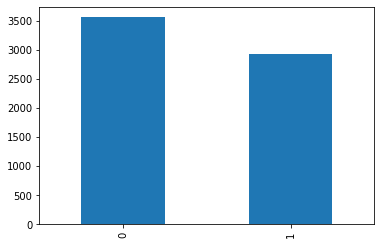

In [9]:
data['label'].value_counts().plot(kind = 'bar')

In [10]:
print(data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   3557
1      1   2921


In [11]:
print(data.isnull().values.any())

False


In [12]:
data['Q'] = data['Q'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data[ : 5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Q,A,label
5290,일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요.,0
5291,년 연애 헤어졌습니다,더 공허함이 크시겠네요.,0
5292,년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요.,0
5293,년 연예의끝,더 마음이 허하겠어요.,0
5294,년만나다 헤어지네,충분히 슬퍼하고 충분히 아파하다가 이겨내세요.,0


In [13]:
data['Q'] = data['Q'].str.replace('^ +', "")
data['Q'].replace('', np.nan, inplace = True)
print(data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [14]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍',
             '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [15]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [16]:
X_train = []

for sentence in tqdm(data['Q']) :
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_train.append(stopwords_removed_sentence)

100%|██████████| 6478/6478 [00:07<00:00, 881.99it/s] 


In [17]:
print(X_train[ : 3])

[['일', '만난', '여자친구', '이별'], ['년', '연애', '헤어지다'], ['년', '연', '애사', '되돌아보다', '다', '부질없다']]


In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [19]:
print(tokenizer.word_index)

{'좋아하다': 1, '사람': 2, '을': 3, '있다': 4, '이별': 5, '헤어지다': 6, '사랑': 7, '너무': 8, '같다': 9, '나': 10, '썸': 11, '내': 12, '되다': 13, '보다': 14, '연락': 15, '한테': 16, '싶다': 17, '남자': 18, '안': 19, '좋다': 20, '없다': 21, '여자친구': 22, '어떻다': 23, '짝남': 24, '년': 25, '연애': 26, '거': 27, '돼다': 28, '여자': 29, '만나다': 30, '남자친구': 31, '것': 32, '오다': 33, '마음': 34, '못': 35, '오늘': 36, '짝녀': 37, '생각': 38, '이다': 39, '인데': 40, '힘드다': 41, '타다': 42, '이제': 43, '만': 44, '그': 45, '말': 46, '하고': 47, '후': 48, '에서': 49, '랑': 50, '힘들다': 51, '알다': 52, '다시': 53, '짝사랑': 54, '잊다': 55, '않다': 56, '달': 57, '그녀': 58, '결혼': 59, '정말': 60, '이랑': 61, '친구': 62, '자다': 63, '수': 64, '애': 65, '다': 66, '뭐': 67, '왜': 68, '가다': 69, '째': 70, '일': 71, '사귀다': 72, '끄다': 73, '모르다': 74, '때': 75, '아니다': 76, '해': 77, '고백': 78, '더': 79, '해주다': 80, '괜찮다': 81, '로': 82, '날': 83, '에게': 84, '받다': 85, '게': 86, '여친': 87, '나르다': 88, '시간': 89, '중': 90, '고': 91, '또': 92, '썸남': 93, '끝': 94, '꿈': 95, '자꾸': 96, '들다': 97, '아프다': 98, '방법': 99, '이야': 100, '네': 101, '인': 102, 

In [21]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items() :
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold) :
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s' % (threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율 :", (rare_cnt / total_cnt) * 100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", (rare_freq / total_freq) * 100)

단어 집합(vocabulary)의 크기 : 3080
등장 빈도가 1번 이하인 희귀 단어의 수 : 1377
단어 집합에서 희귀 단어의 비율 : 44.70779220779221
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 4.551614715895944


In [22]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 1704


In [23]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [24]:
print(X_train[ : 3])

[[71, 207, 22, 5], [25, 26, 6], [25, 835, 66, 990]]


In [25]:
y_train = np.array(data['label'])

In [26]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [27]:
X_train = np.delete(X_train, drop_train, axis = 0)
y_train = np.delete(y_train, drop_train, axis = 0)
print(len(X_train))
print(len(y_train))

6441
6441


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


문장의 최대 길이 : 17
문장의 평균 길이 : 4.48315478962894


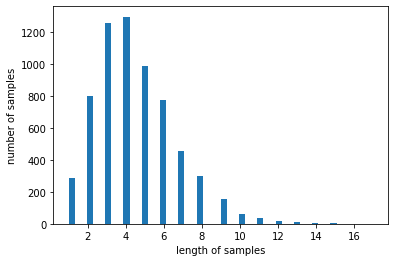

In [28]:
print('문장의 최대 길이 :', max(len(review) for review in X_train))
print('문장의 평균 길이 :', sum(map(len, X_train)) / len(X_train))
plt.hist([len(review) for review in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
def below_threshold_len(max_len, nested_list) :
  count = 0
  for sentence in nested_list :
    if(len(sentence) <= max_len) :
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' % (max_len, (count / len(nested_list)) * 100))

In [30]:
max_len = 10
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 10 이하인 샘플의 비율: 98.85111007607514


In [31]:
X_train = pad_sequences(X_train, maxlen = max_len)

In [48]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation = 'sigmoid'))

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 100, callbacks = [es, mc], batch_size = 64, validation_split = 0.2)

Epoch 1/100
80/81 [============================>.] - ETA: 0s - loss: 0.4299 - acc: 0.7980
Epoch 1: val_acc improved from -inf to 0.68270, saving model to best_model.h5
81/81 [==============================] - 6s 41ms/step - loss: 0.4281 - acc: 0.7993 - val_loss: 0.9194 - val_acc: 0.6827
Epoch 2/100
79/81 [============================>.] - ETA: 0s - loss: 0.2242 - acc: 0.9126
Epoch 2: val_acc improved from 0.68270 to 0.70753, saving model to best_model.h5
81/81 [==============================] - 2s 27ms/step - loss: 0.2235 - acc: 0.9127 - val_loss: 0.9211 - val_acc: 0.7075
Epoch 3/100
80/81 [============================>.] - ETA: 0s - loss: 0.1804 - acc: 0.9301
Epoch 3: val_acc improved from 0.70753 to 0.76416, saving model to best_model.h5
81/81 [==============================] - 3s 35ms/step - loss: 0.1799 - acc: 0.9301 - val_loss: 0.6752 - val_acc: 0.7642
Epoch 4/100
81/81 [==============================] - ETA: 0s - loss: 0.1626 - acc: 0.9377
Epoch 4: val_acc improved from 0.76416 t

In [49]:
loaded_model = load_model('best_model.h5')

In [68]:
def sentiment_predict(new_sentence) :
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem = True)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)
  score = float(loaded_model.predict(pad_new))
  if(score > 0.2) :
    print("{:.2f}% 확률로 긍정입니다.\n".format((score - 0.2) * 62.5 + 50))
  else :
    print("{:.2f}% 확률로 부정입니다.\n".format((0.2 - score) * 250 + 50))

In [74]:
while True :
  a = input()
  if a == '.' :
    break
  sentiment_predict(a)

사랑해
91.74% 확률로 긍정입니다.

좋아해
96.79% 확률로 긍정입니다.

너는 멋진 사람이야
97.45% 확률로 긍정입니다.

10년 연애했는데 헤어짐;;
89.79% 확률로 부정입니다.

그 사람이랑 결혼 성공함!
99.82% 확률로 긍정입니다.

좋다
62.36% 확률로 긍정입니다.

싫다
53.83% 확률로 부정입니다.

좋다가 싫다가 좋다가 싫다가;;
59.33% 확률로 긍정입니다.

.


In [80]:
while True :
  a = input()
  if a == '.' :
    break
  sentiment_predict(a)

좋다
62.36% 확률로 긍정입니다.

좋다좋다
72.02% 확률로 긍정입니다.

좋다좋다좋다
79.39% 확률로 긍정입니다.

싫다
53.83% 확률로 부정입니다.

싫다싫다
66.36% 확률로 부정입니다.

정말 싫다
94.36% 확률로 부정입니다.

.
